In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

In [3]:
boston = fetch_openml(name='boston')
df= pd.DataFrame(boston.data)

C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\datasets\_openml.py:301: UserWarning: Multiple active versions of the dataset matching the name boston exist. Versions may be fundamentally different, returning version 1.
  warn(
C:\Users\shubh\anaconda3\envs\env\lib\site-packages\sklearn\datasets\_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [10]:

#df.columns = boston.feature_names
df['MEDV'] = boston.target
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


In [11]:
X= df.iloc[:,0:-1]
y= df.iloc[:,-1]

In [17]:
from sklearn.tree import DecisionTreeRegressor
rt= DecisionTreeRegressor(criterion= 'friedman_mse', max_depth= 5)

In [18]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state= 20)

In [19]:
rt.fit(X_train,y_train)

DecisionTreeRegressor(criterion='friedman_mse', max_depth=5)

In [22]:
from sklearn.metrics import r2_score
y_pred= rt.predict(X_test)

r2_score(y_test,y_pred)*100

75.1469680466601

# Hyper Paramater Tuning

In [28]:

param_grid = {'criterion': ['squared_error','friedman_mse'], 
              'max_depth':  [2,4,8,10,None], 
              'min_samples_split': [0.25,0.5,1.0], 
              'max_features': [0.25,0.5,1.0]
             }                                         

In [30]:
from sklearn.model_selection import GridSearchCV
     
reg = GridSearchCV(DecisionTreeRegressor(),param_grid=param_grid)

In [31]:

reg.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'friedman_mse'],
                         'max_depth': [2, 4, 8, 10, None],
                         'max_features': [0.25, 0.5, 1.0],
                         'min_samples_split': [0.25, 0.5, 1.0]})

In [32]:
reg.best_score_

0.7459422830564247

In [33]:

reg.best_params_

{'criterion': 'squared_error',
 'max_depth': 8,
 'max_features': 1.0,
 'min_samples_split': 0.25}

# Feature Importance

In [34]:
for importance, name in sorted(zip(rt.feature_importances_, X_train.columns),reverse=True):
  print (name, importance)

LSTAT 0.5807021864789718
RM 0.2663687328099186
DIS 0.0943075277010632
B 0.025683414280634777
CRIM 0.012542810718824541
PTRATIO 0.011160345306217881
NOX 0.006788746583641321
TAX 0.002223824100991672
CHAS 0.0002224120197364061
ZN 0.0
RAD 0.0
INDUS 0.0
AGE 0.0


[Text(0.40625, 0.9166666666666666, 'x[12] <= 9.725\nfriedman_mse = 89.208\nsamples = 404\nvalue = 22.764'),
 Text(0.14583333333333334, 0.75, 'x[5] <= 7.445\nfriedman_mse = 77.59\nsamples = 174\nvalue = 30.244'),
 Text(0.0625, 0.5833333333333334, 'x[7] <= 1.485\nfriedman_mse = 41.389\nsamples = 149\nvalue = 27.77'),
 Text(0.041666666666666664, 0.4166666666666667, 'friedman_mse = 0.0\nsamples = 5\nvalue = 50.0'),
 Text(0.08333333333333333, 0.4166666666666667, 'x[5] <= 6.722\nfriedman_mse = 25.072\nsamples = 144\nvalue = 26.999'),
 Text(0.041666666666666664, 0.25, 'x[5] <= 6.36\nfriedman_mse = 8.771\nsamples = 89\nvalue = 24.069'),
 Text(0.020833333333333332, 0.08333333333333333, 'friedman_mse = 4.64\nsamples = 44\nvalue = 22.42'),
 Text(0.0625, 0.08333333333333333, 'friedman_mse = 7.558\nsamples = 45\nvalue = 25.68'),
 Text(0.125, 0.25, 'x[10] <= 19.45\nfriedman_mse = 15.076\nsamples = 55\nvalue = 31.74'),
 Text(0.10416666666666667, 0.08333333333333333, 'friedman_mse = 11.954\nsamples = 

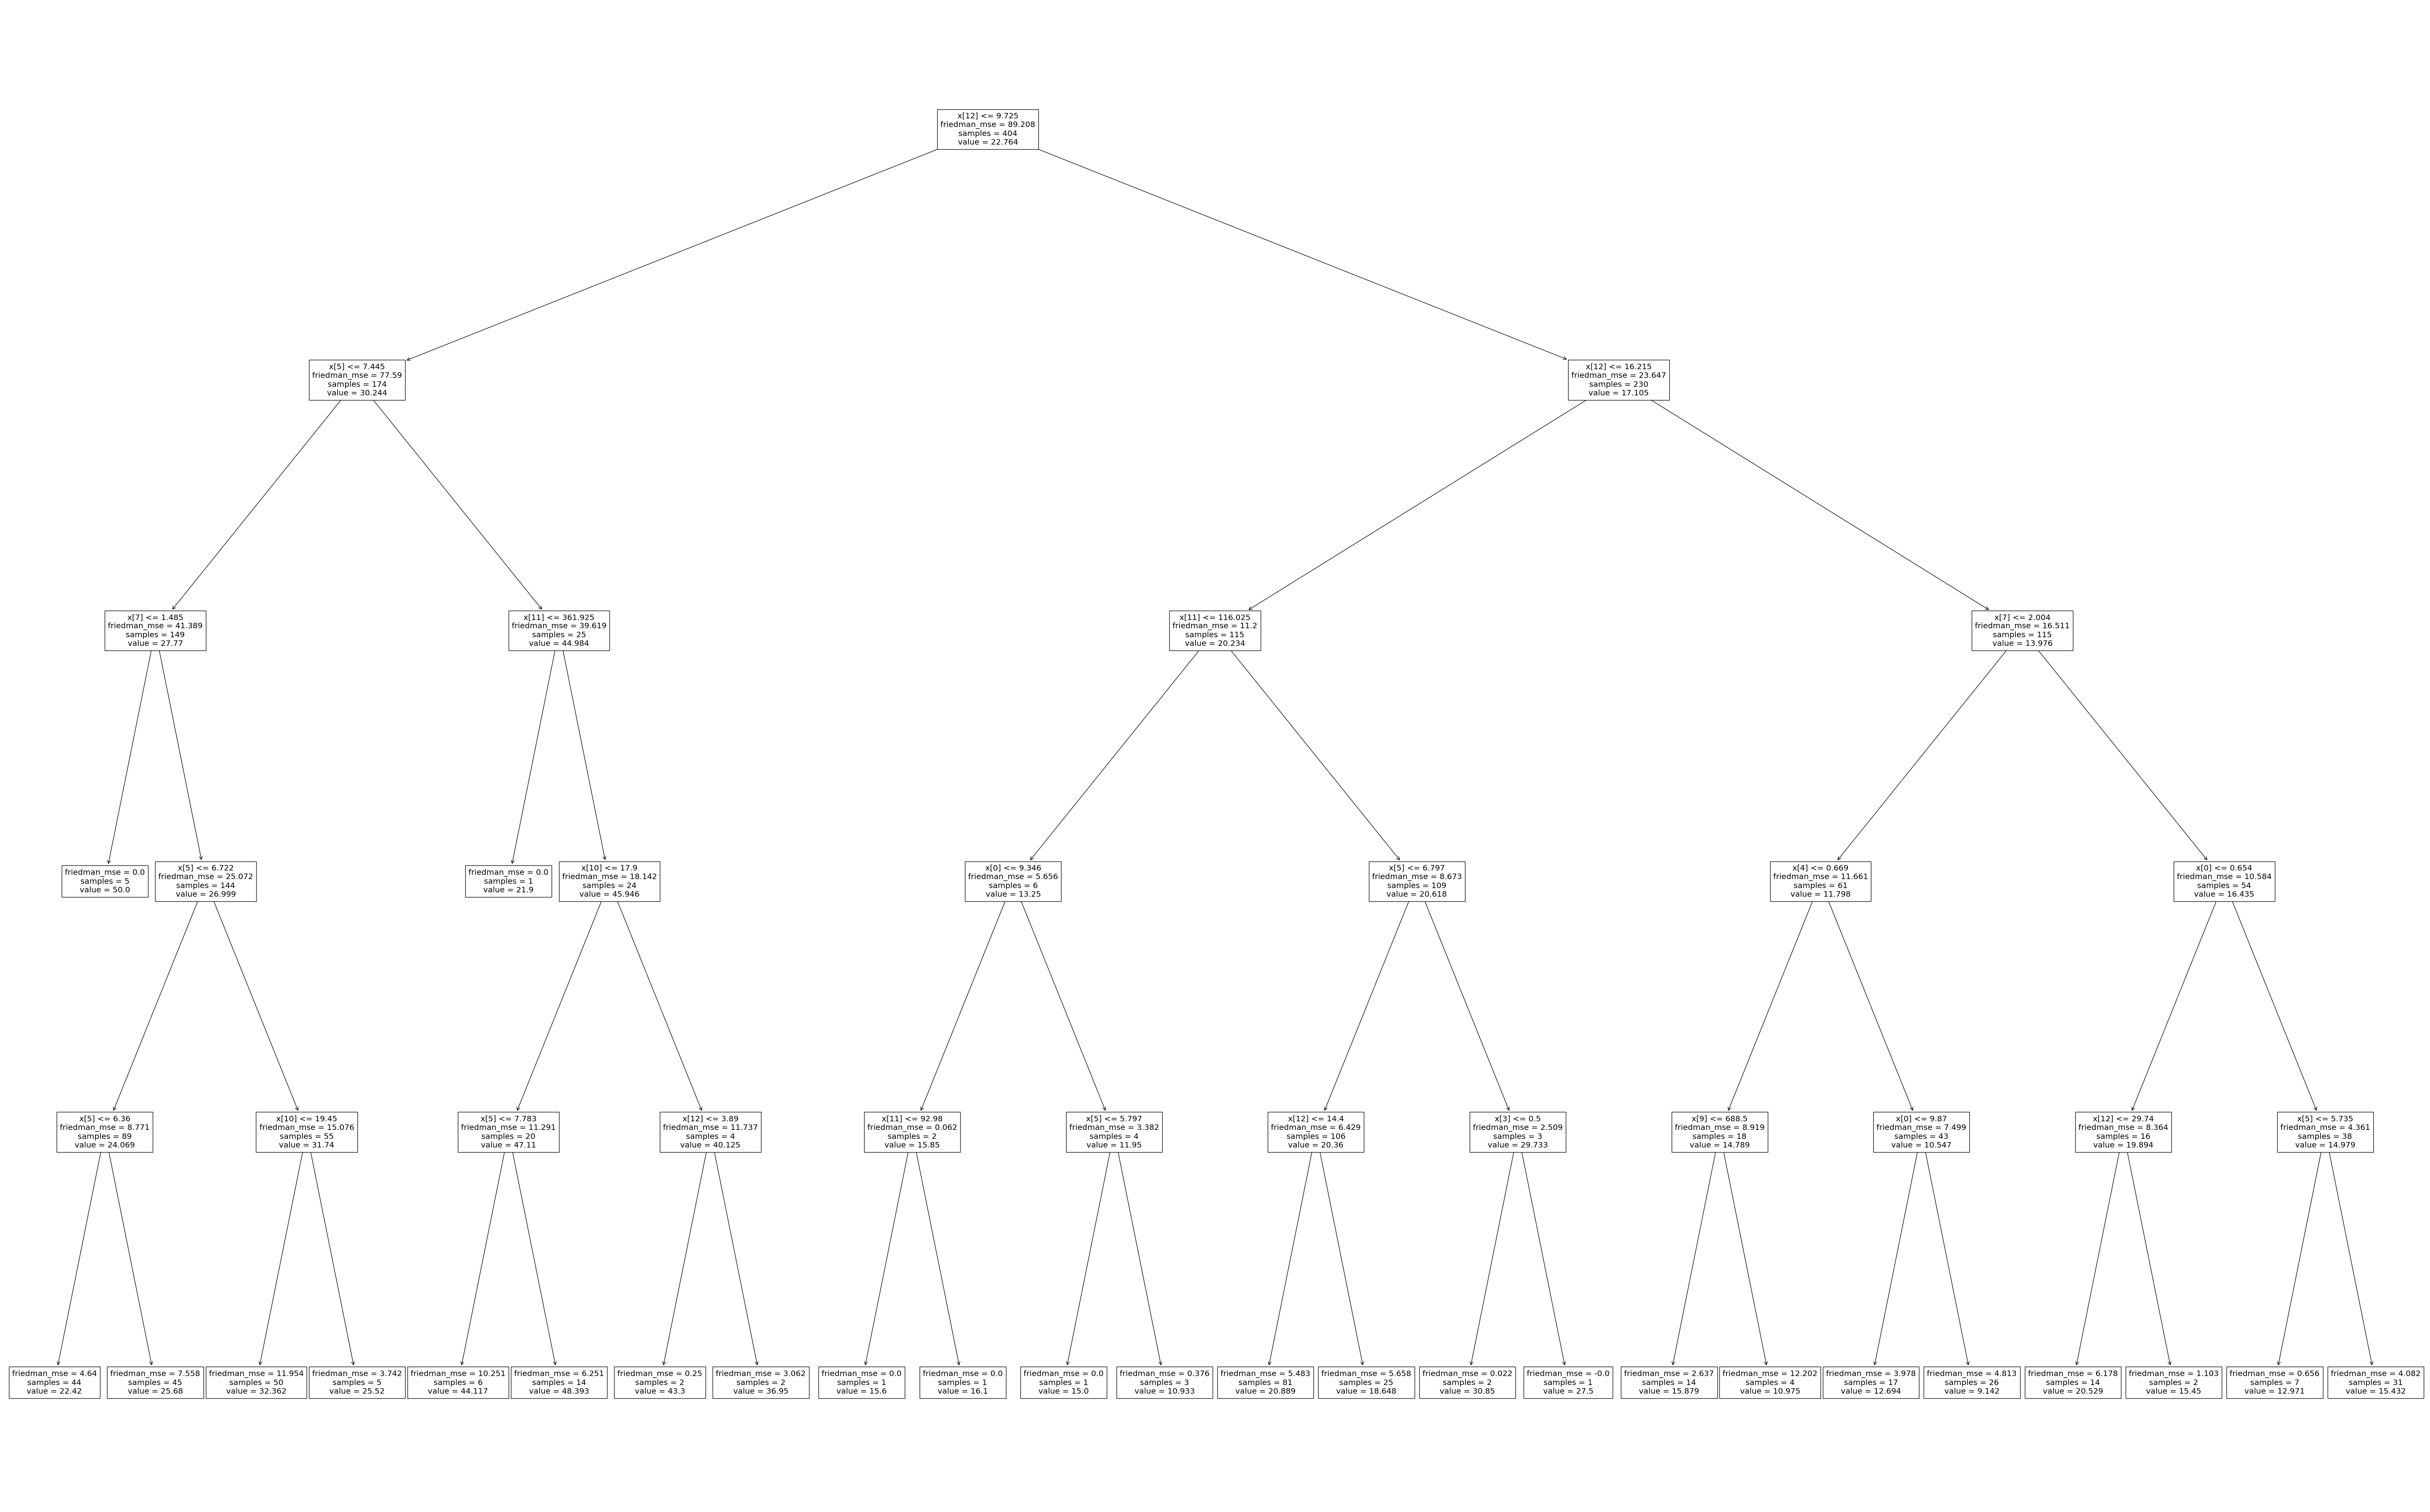

In [36]:
from sklearn.tree import plot_tree

from matplotlib.pylab import rcParams

rcParams['figure.figsize']= 80,50

plot_tree(rt)